In [1]:
import pandas as pd
import os

# Define the folder containing the CSV files
data_folder = 'Data Files'  # Update with the correct path to your data folder

# List of files to process
files = ['D19.csv', 'D21.csv', 'GP21.csv', 'MSE21.csv', 'NP21.csv', 'SRM22.csv', 'SRM23.csv']

# Dictionary to store the DataFrames
dataframes = {}

# Load each CSV file into a DataFrame
for file in files:
    file_path = os.path.join(data_folder, file)
    df = pd.read_csv(file_path)
    df['Created Date'] = pd.to_datetime(df['Created Date'], format='%d/%m/%Y', errors='coerce')
    dataframes[file] = df


In [2]:
attending_vs_attended_summary = []

for file, df in dataframes.items():
    total_attending = df['Attendee Status'].value_counts().get('Attending', 0)
    attended_yes = df['Attended'].value_counts().get('Yes', 0)
    attended_no = df['Attended'].value_counts().get('No', 0)
    cancelled = df['Attendee Status'].value_counts().get('Cancelled', 0)
    
    summary = {
        'File': file,
        'Total Attending': total_attending,
        'Attended Yes': attended_yes,
        'Attended No': attended_no,
        'Cancelled': cancelled,
        'Percentage Attended Yes': (attended_yes / total_attending) * 100 if total_attending else 0,
        'Percentage Attended No': (attended_no / total_attending) * 100 if total_attending else 0,
        'Percentage Cancelled': (cancelled / total_attending) * 100 if total_attending else 0
    }
    attending_vs_attended_summary.append(summary)

attending_vs_attended_summary_df = pd.DataFrame(attending_vs_attended_summary)
attending_vs_attended_summary_df.set_index('File', inplace=True)

attending_vs_attended_summary_df


,Total Attending,Attended Yes,Attended No,Cancelled,Percentage Attended Yes,Percentage Attended No,Percentage Cancelled
File,,,,,,,
D19.csv,1082,839,247,90,77.541590,22.828096,8.317930
D21.csv,669,340,0,2,50.822123,0.000000,0.298954
GP21.csv,767,0,0,31,0.000000,0.000000,4.041721
MSE21.csv,1582,0,0,19,0.000000,0.000000,1.201011
NP21.csv,401,280,28,0,69.825436,6.982544,0.000000
SRM22.csv,998,196,80,0,19.639279,8.016032,0.000000
SRM23.csv,741,300,48,12,40.485830,6.477733,1.619433


<Figure size 1400x700 with 0 Axes>

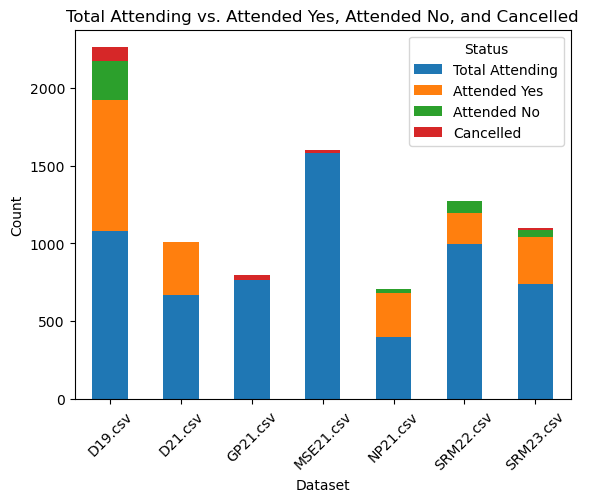

<Figure size 1400x700 with 0 Axes>

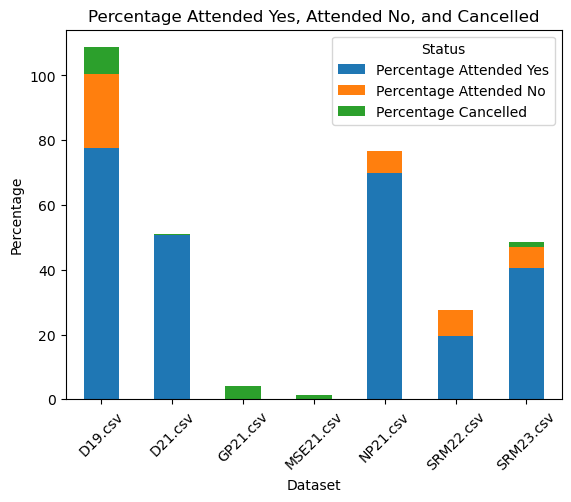

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Total Attending vs. Attended Yes, Attended No, and Cancelled
plt.figure(figsize=(14, 7))
attending_vs_attended_summary_df[['Total Attending', 'Attended Yes', 'Attended No', 'Cancelled']].plot(kind='bar', stacked=True)
plt.title('Total Attending vs. Attended Yes, Attended No, and Cancelled')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

# Plot Percentage Attended Yes, Attended No, and Cancelled
plt.figure(figsize=(14, 7))
attending_vs_attended_summary_df[['Percentage Attended Yes', 'Percentage Attended No', 'Percentage Cancelled']].plot(kind='bar', stacked=True)
plt.title('Percentage Attended Yes, Attended No, and Cancelled')
plt.xlabel('Dataset')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()


In [4]:
attend_but_did_not_attend = []
did_not_attend_but_attended = []

for file, df in dataframes.items():
    attend_but_not = df[(df['Attendee Status'] == 'Attending') & (df['Attended'] != 'Yes')]
    not_attend_but_attend = df[(df['Attendee Status'] != 'Attending') & (df['Attended'] == 'Yes')]
    
    attend_but_did_not_attend.extend(attend_but_not[['Reference', 'Attendee Status', 'Attended']].to_dict('records'))
    did_not_attend_but_attended.extend(not_attend_but_attend[['Reference', 'Attendee Status', 'Attended']].to_dict('records'))

attend_but_did_not_attend_df = pd.DataFrame(attend_but_did_not_attend)
did_not_attend_but_attended_df = pd.DataFrame(did_not_attend_but_attended)

attend_but_did_not_attend_df.head()


,Reference,Attendee Status,Attended
0,A802515,Attending,No
1,A802516,Attending,No
2,A802520,Attending,No
3,A802523,Attending,No
4,A802528,Attending,No


In [5]:
# Display the lists
print("People who said they would attend but didn't:")
print(attend_but_did_not_attend_df.head())

print("\nPeople who didn't say they would attend but did:")
print(did_not_attend_but_attended_df.head())

People who said they would attend but didn't:
  Reference Attendee Status Attended
0   A802515       Attending       No
1   A802516       Attending       No
2   A802520       Attending       No
3   A802523       Attending       No
4   A802528       Attending       No

People who didn't say they would attend but did:
  Reference       Attendee Status Attended
0   A802561             Cancelled      Yes
1   A802562             Cancelled      Yes
2   A808035             Cancelled      Yes
3   A809437  Booker not attending      Yes
4   A809644             Cancelled      Yes
